# Testing Feedforward Neural Network using TensorFlow


In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflowjs as tfjs

from Model import create_model

plt.rcParams["figure.dpi"] = 600

2023-04-07 16:18:46.014743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Basic Test (If sum of `N` random numbers between 0 - 1 is greater than `N / 2`)


**Creating Testing/Training data**


In [2]:
NPL = [4, 10, 10, 10, 1]
TRAINING_EXAMPLES = 5000
TESTING_EXAMPLES = 1000

train_X = np.random.random(size=(TRAINING_EXAMPLES, NPL[0]))
train_y = (train_X.sum(1, keepdims=True) > (NPL[0] / 2)).astype(float)

test_X = np.random.random(size=(TESTING_EXAMPLES, NPL[0]))
test_y = (test_X.sum(1, keepdims=True) > (NPL[0] / 2)).astype(float)

**Creating Model**


In [3]:
model = create_model(NPL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


**Training Model**


In [4]:
history = model.fit(train_X, train_y, epochs=20)


Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.2509 - accuracy: 0.4938
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.5148
Epoch 3/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.4910
Epoch 4/20
157/157 [==============================] - 0s 951us/step - loss: 0.2509 - accuracy: 0.4988
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.5050
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.4988
Epoch 7/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.5110
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.5144
Epoch 9/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.4970
Epoch 10/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.50

**Testing Model**


In [5]:
results = model.evaluate(test_X, test_y)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")


32/32 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.4860
Test loss: 0.25019246339797974, Test accuracy: 0.4860000014305115


In [6]:
TEST_EXAMPLE = 23

prediction = model.predict(test_X[TEST_EXAMPLE, None])

print(
    f"Sum of testing data ({np.sum(test_X[TEST_EXAMPLE])}) is {'greater' if test_y[TEST_EXAMPLE, 0] else 'less'} than {NPL[0] / 2}"
)
print(f"Expected output is {test_y[TEST_EXAMPLE, 0]}")
print(f"Network predicted: {prediction[0, 0]}")

1/1 [==============================] - 0s 134ms/step
Sum of testing data (1.6208892873975842) is less than 2.0
Expected output is 0.0
Network predicted: 0.5070199966430664


**Plotting Training History**


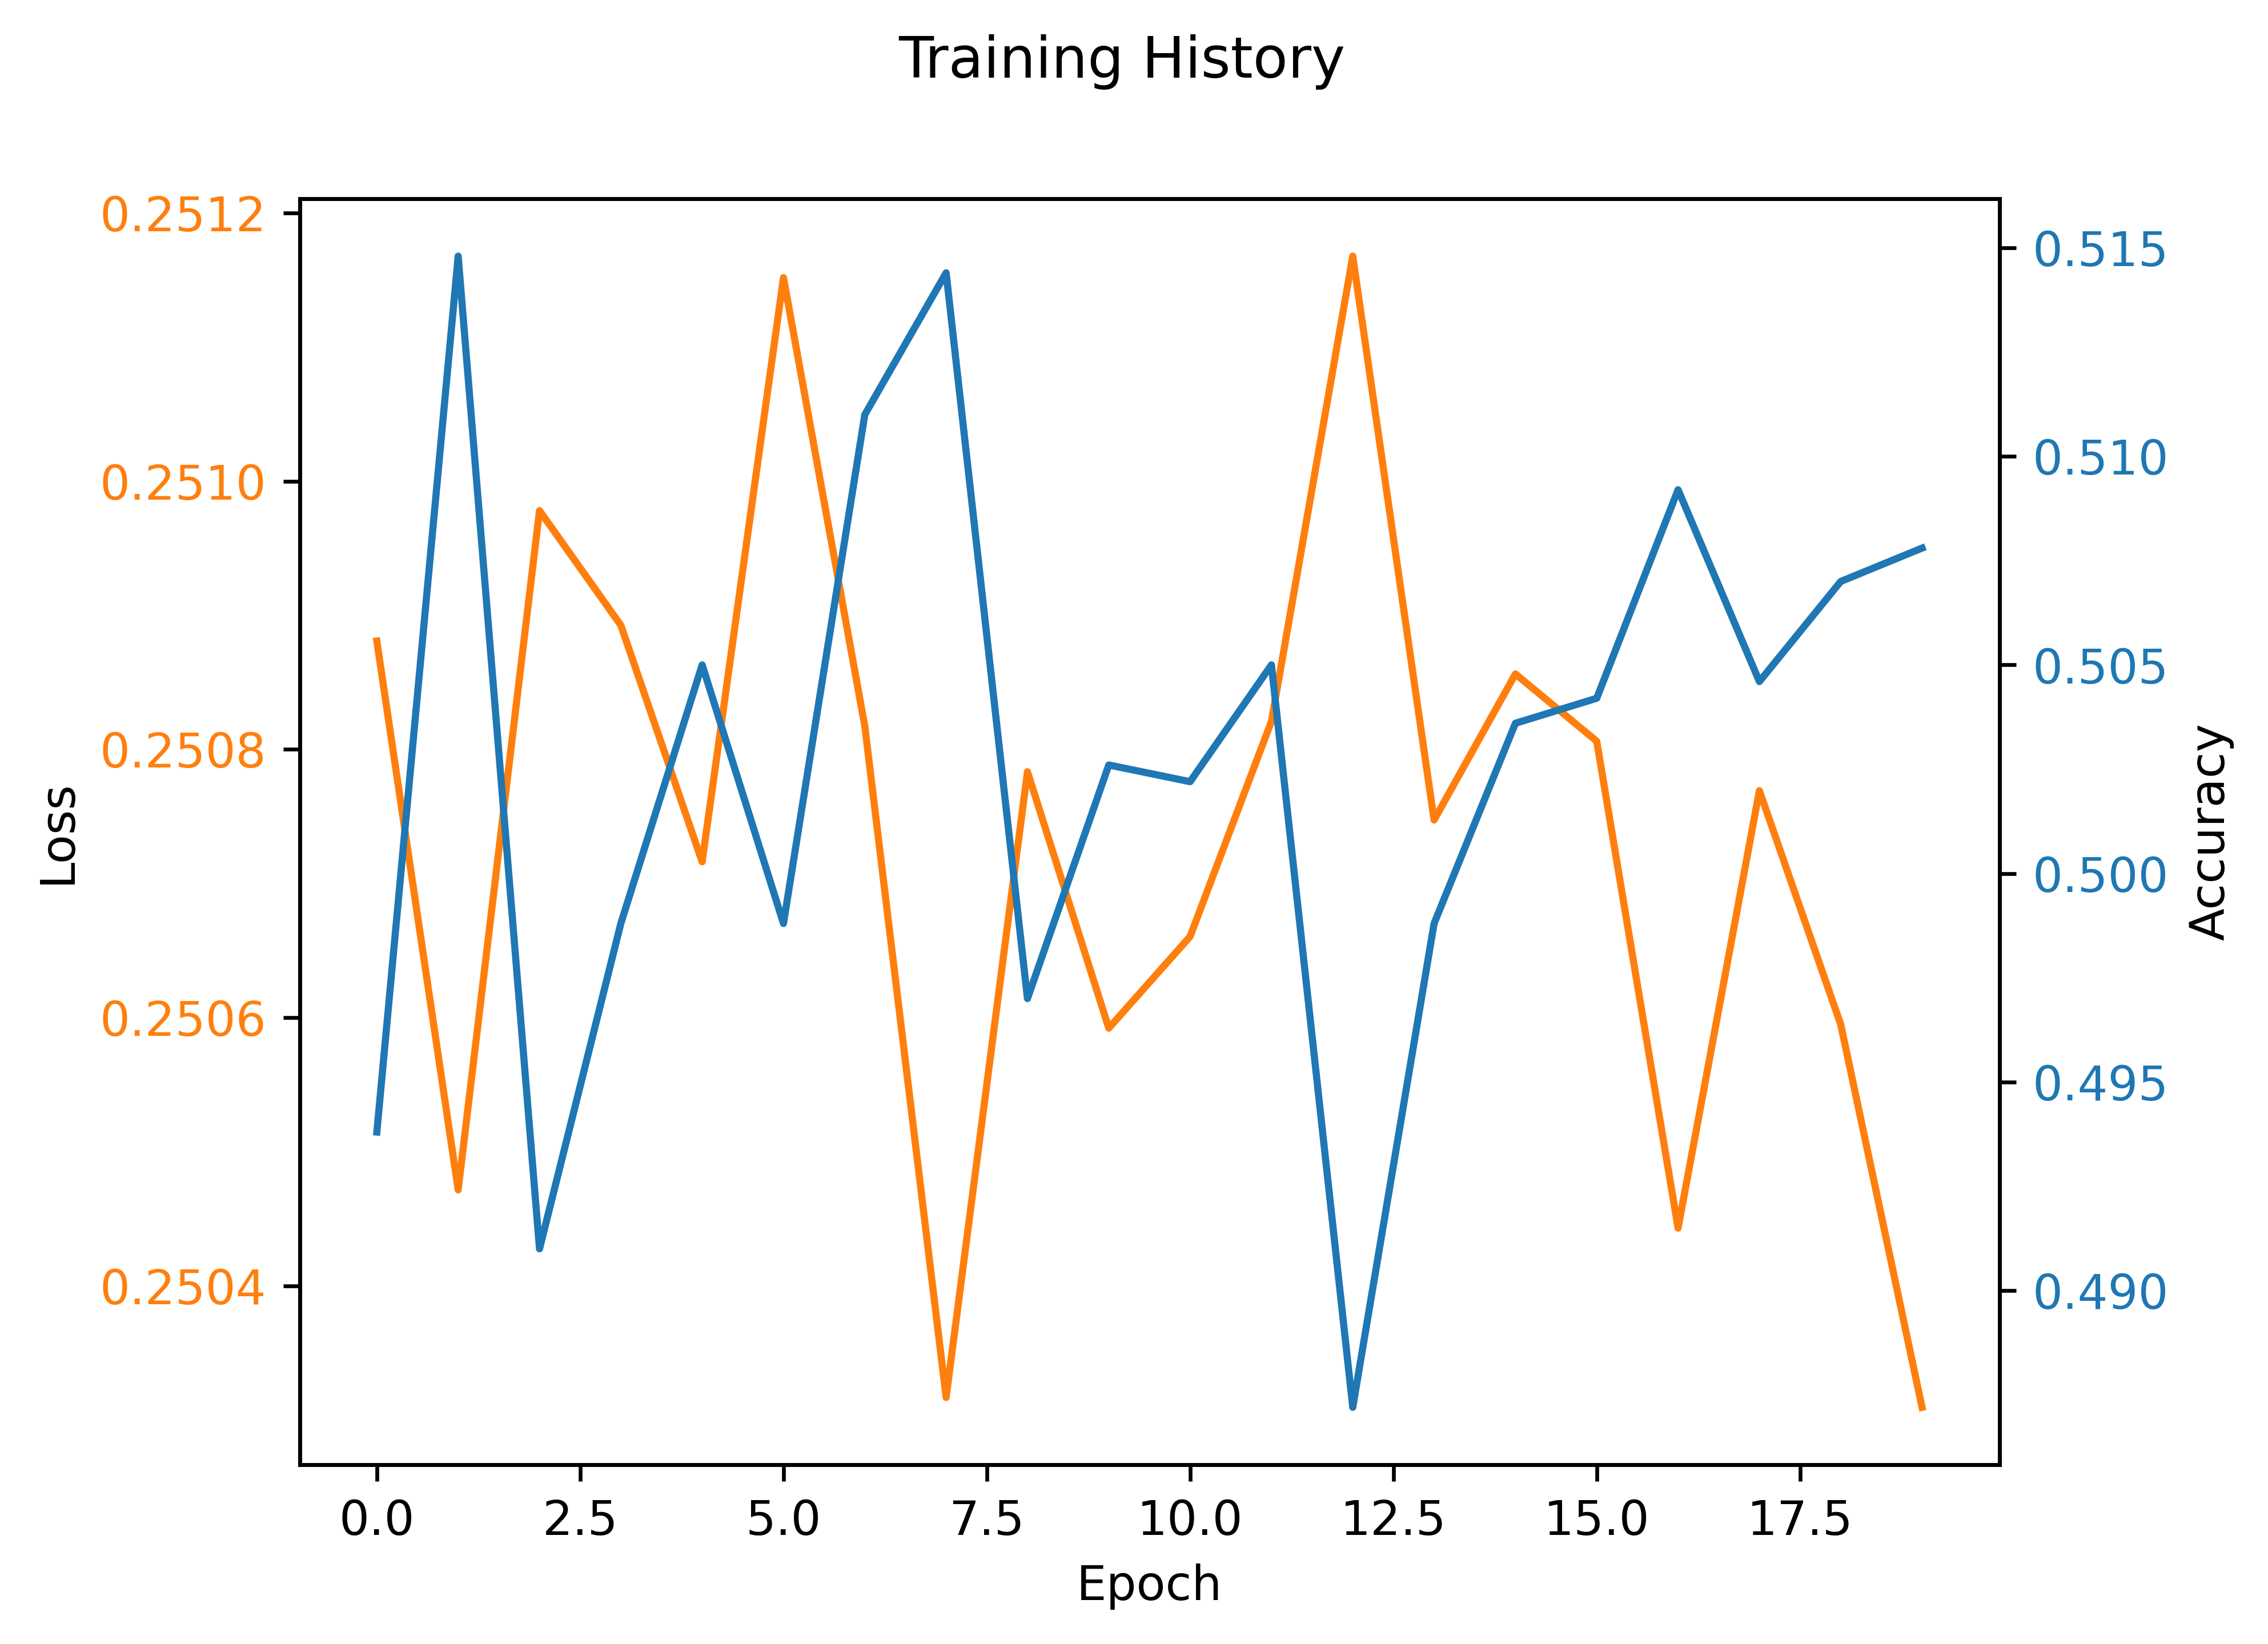

In [7]:
fig, ax1 = plt.subplots()
fig.suptitle("Training History")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(history.history["loss"], color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

ax2 = ax1.twinx()

ax2.set_ylabel("Accuracy")
ax2.plot(history.history["accuracy"], color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.show()

### MNIST Test


**Loading MNIST Data**


In [8]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

# Flattening image and converting pixels to 0.0 -> 1.0
train_X = (train_X / 255).reshape((60000, 784))
test_X = (test_X / 255).reshape((10000, 784))

# One-hot encoding labels
train_y = np.eye(10, dtype=np.float32)[train_y]
test_y = np.eye(10, dtype=np.float32)[test_y]


**Creating Model**


In [9]:
NPL = [784, 100, 10]

model = create_model(NPL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               615440    
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


**Training Model**


In [10]:
history = model.fit(train_X, train_y, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.0882 - accuracy: 0.2475
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0725 - accuracy: 0.5116
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.7192
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.8087
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0316 - accuracy: 0.8514
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.8687
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0244 - accuracy: 0.8796
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.8864
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0208 - accuracy: 0.8913
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

**Testing Model**


In [11]:
results = model.evaluate(test_X, test_y)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")


313/313 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 0.9035
Test loss: 0.01823716051876545, Test accuracy: 0.9035000205039978


1/1 [==============================] - 0s 58ms/step
Expected output is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Network predicted: [8.7098160e-05 1.4895907e-01 9.1234106e-01 2.7657962e-01 1.5152778e-04
 8.5615070e-04 2.1355718e-03 2.2112948e-04 1.6799867e-01 2.7541930e-04]


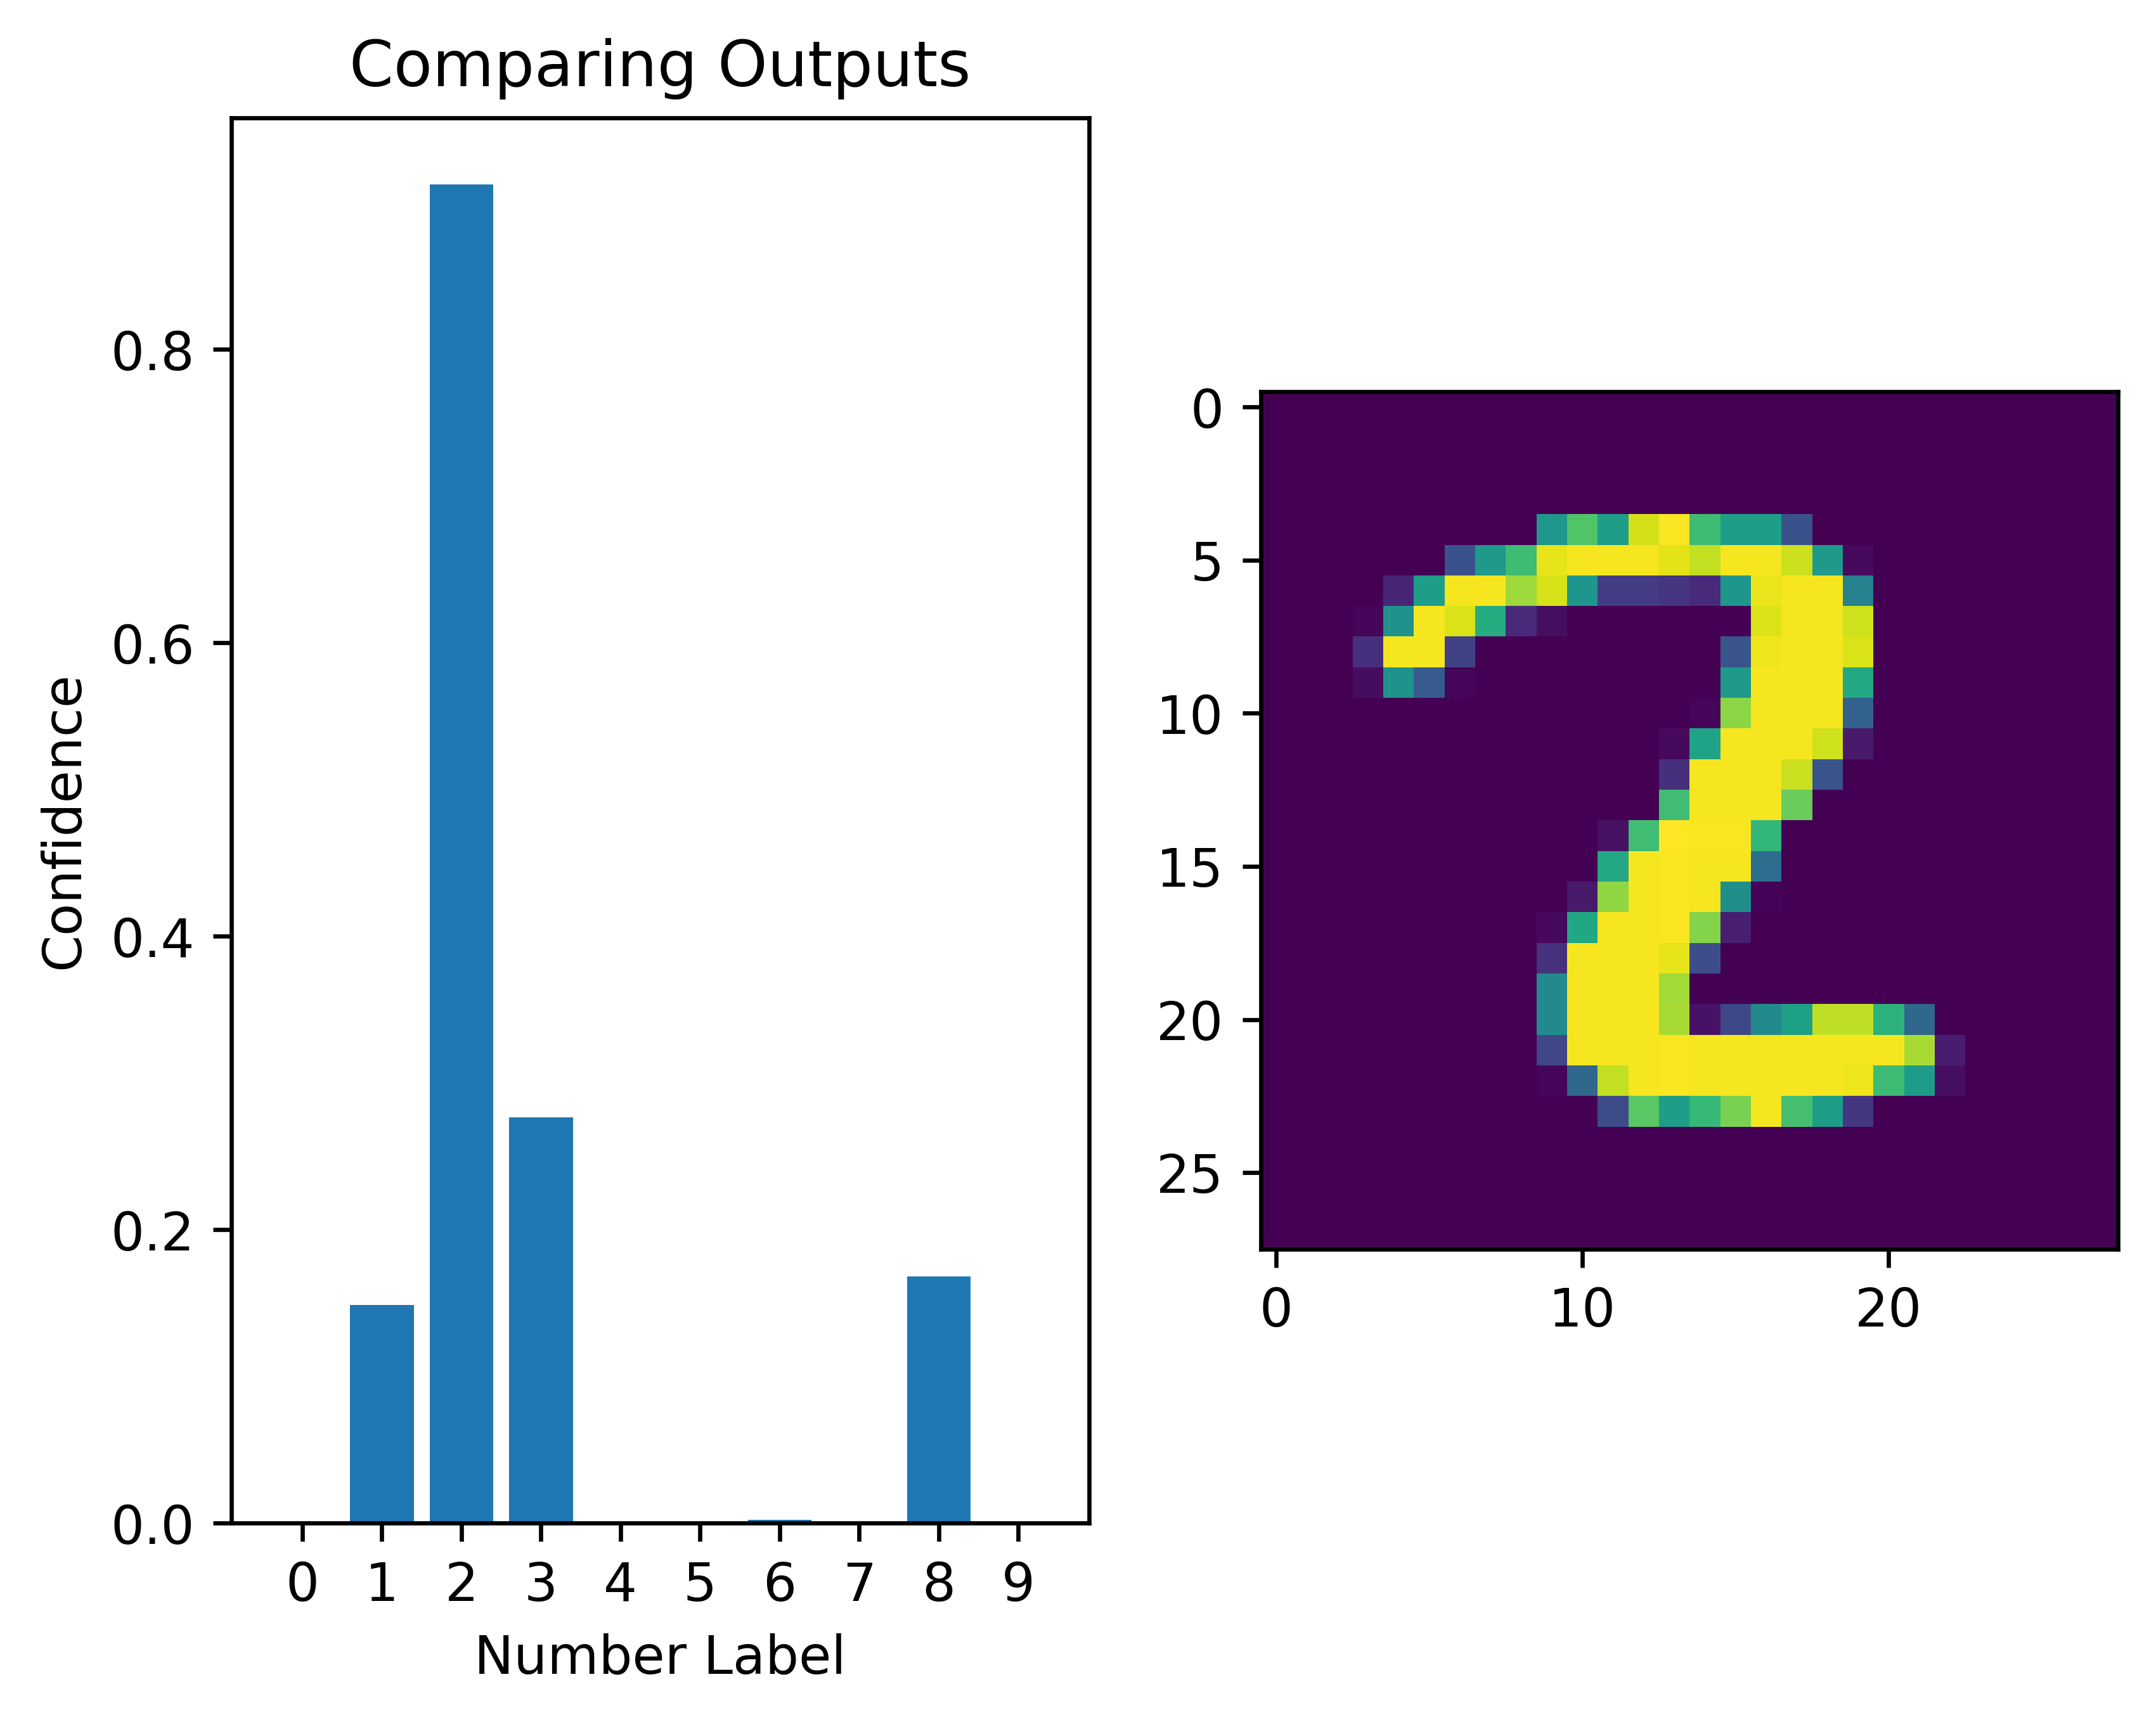

In [12]:
TEST_EXAMPLE = 4274

prediction = model.predict(test_X[TEST_EXAMPLE, None])

fig, axes = plt.subplots(1, 2)
axes[0].bar(x=[str(x) for x in range(10)], height=prediction[0])
axes[0].set_title("Comparing Outputs")
axes[0].set_ylabel("Confidence")
axes[0].set_xlabel("Number Label")

axes[1].imshow(test_X[TEST_EXAMPLE].reshape((28, 28)))

print(f"Expected output is {test_y[TEST_EXAMPLE]}")
print(f"Network predicted: {prediction[0]}")


**Plotting Training History**


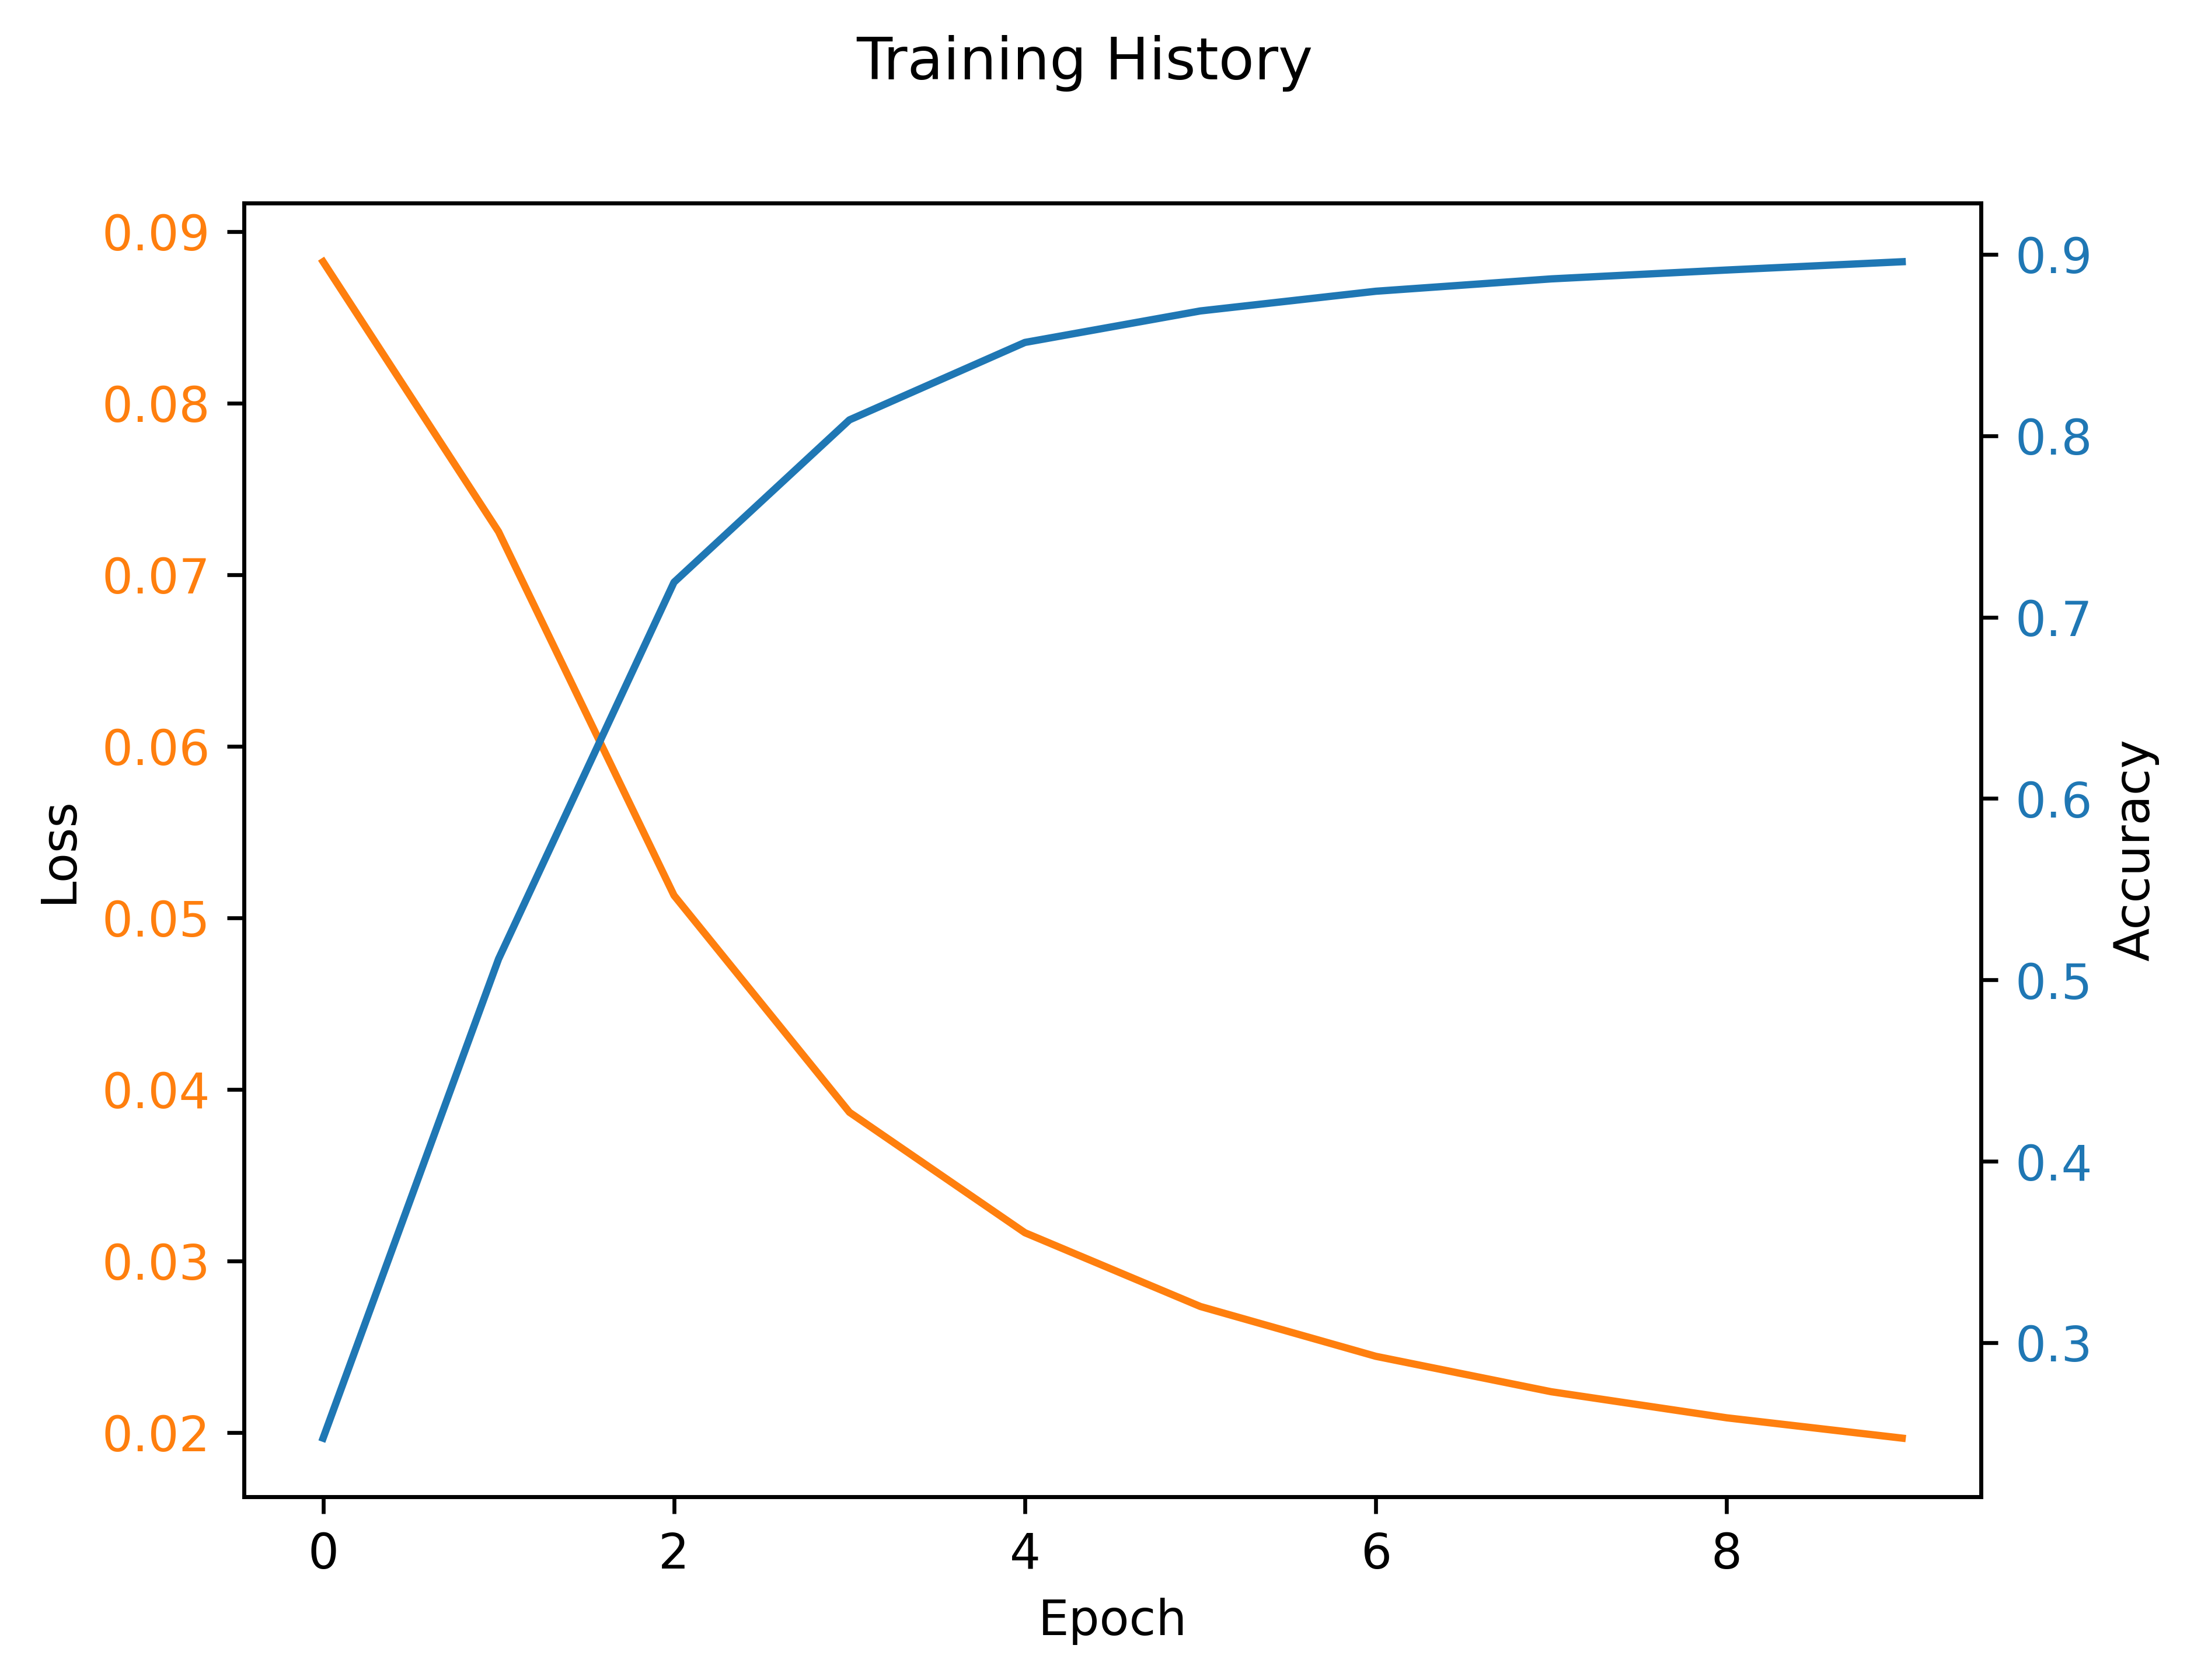

In [13]:
fig, ax1 = plt.subplots()
fig.suptitle("Training History")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(history.history["loss"], color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

ax2 = ax1.twinx()

ax2.set_ylabel("Accuracy")
ax2.plot(history.history["accuracy"], color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.show()


**Plotting Weights**


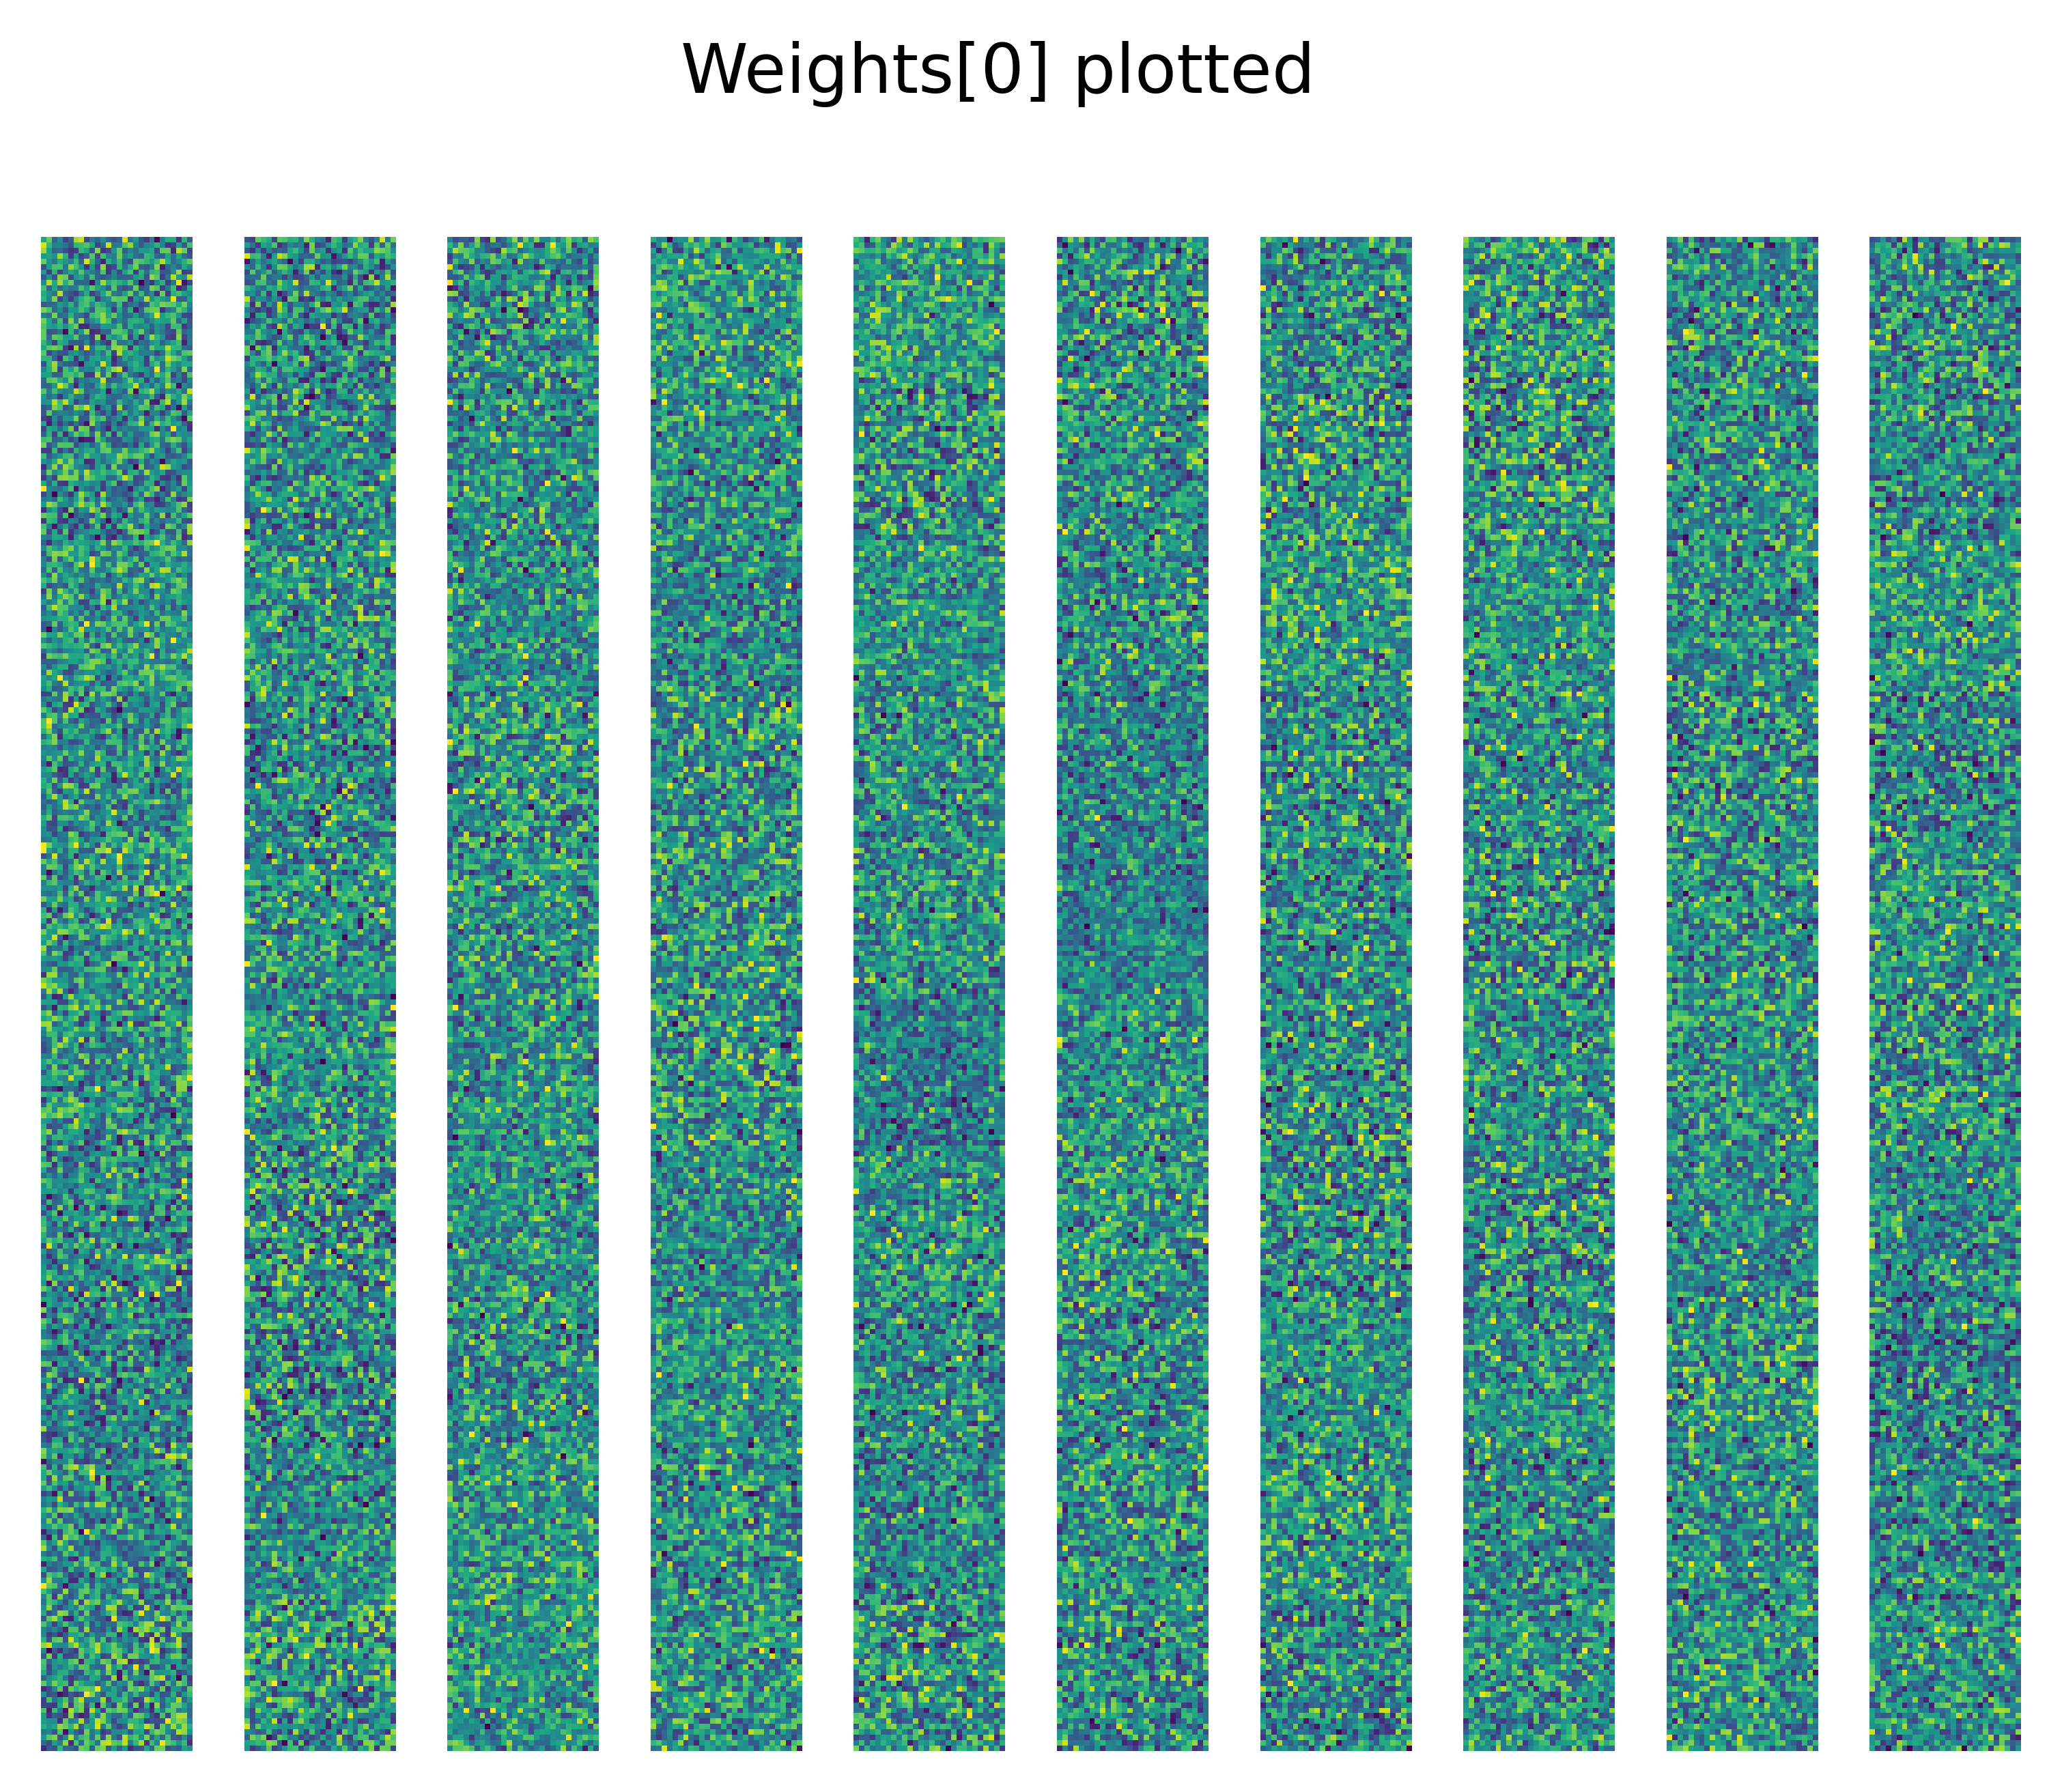

In [14]:
root_im = math.sqrt(NPL[1])
im_rows, im_cols = (math.floor(root_im), math.ceil(root_im))

curr_row = 0
curr_col = 0

fig, axes = plt.subplots(im_rows, im_cols)

fig.suptitle("Weights[0] plotted")

for weights in range(NPL[1]):
    if curr_col == im_cols:
        curr_col = 0
        curr_row += 1

    ax = axes[curr_row][curr_col]
    ax.axis("off")
    ax.imshow(model.layers[1].get_weights()[0][:, weights].reshape((28, 28)))

    curr_col += 1

fig.subplots_adjust(wspace=0, hspace=0)


### TensorFlow.js example


**Creating Model**


In [24]:
NPL = [784, 100, 10]

model = create_model(NPL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03, momentum=0.009),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 784)               615440    
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


**Training Model**


In [25]:
history = model.fit(train_X, train_y, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0950 - accuracy: 0.1305
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0895 - accuracy: 0.1489
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0892 - accuracy: 0.1862
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.2506
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - accuracy: 0.3273
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.3492
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.3686
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.3904
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0860 - accuracy: 0.4047
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

**Testing Model**


In [26]:
results = model.evaluate(test_X, test_y)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0181 - accuracy: 0.9034
Test loss: 0.01806659996509552, Test accuracy: 0.9034000039100647


**Plotting Training History**


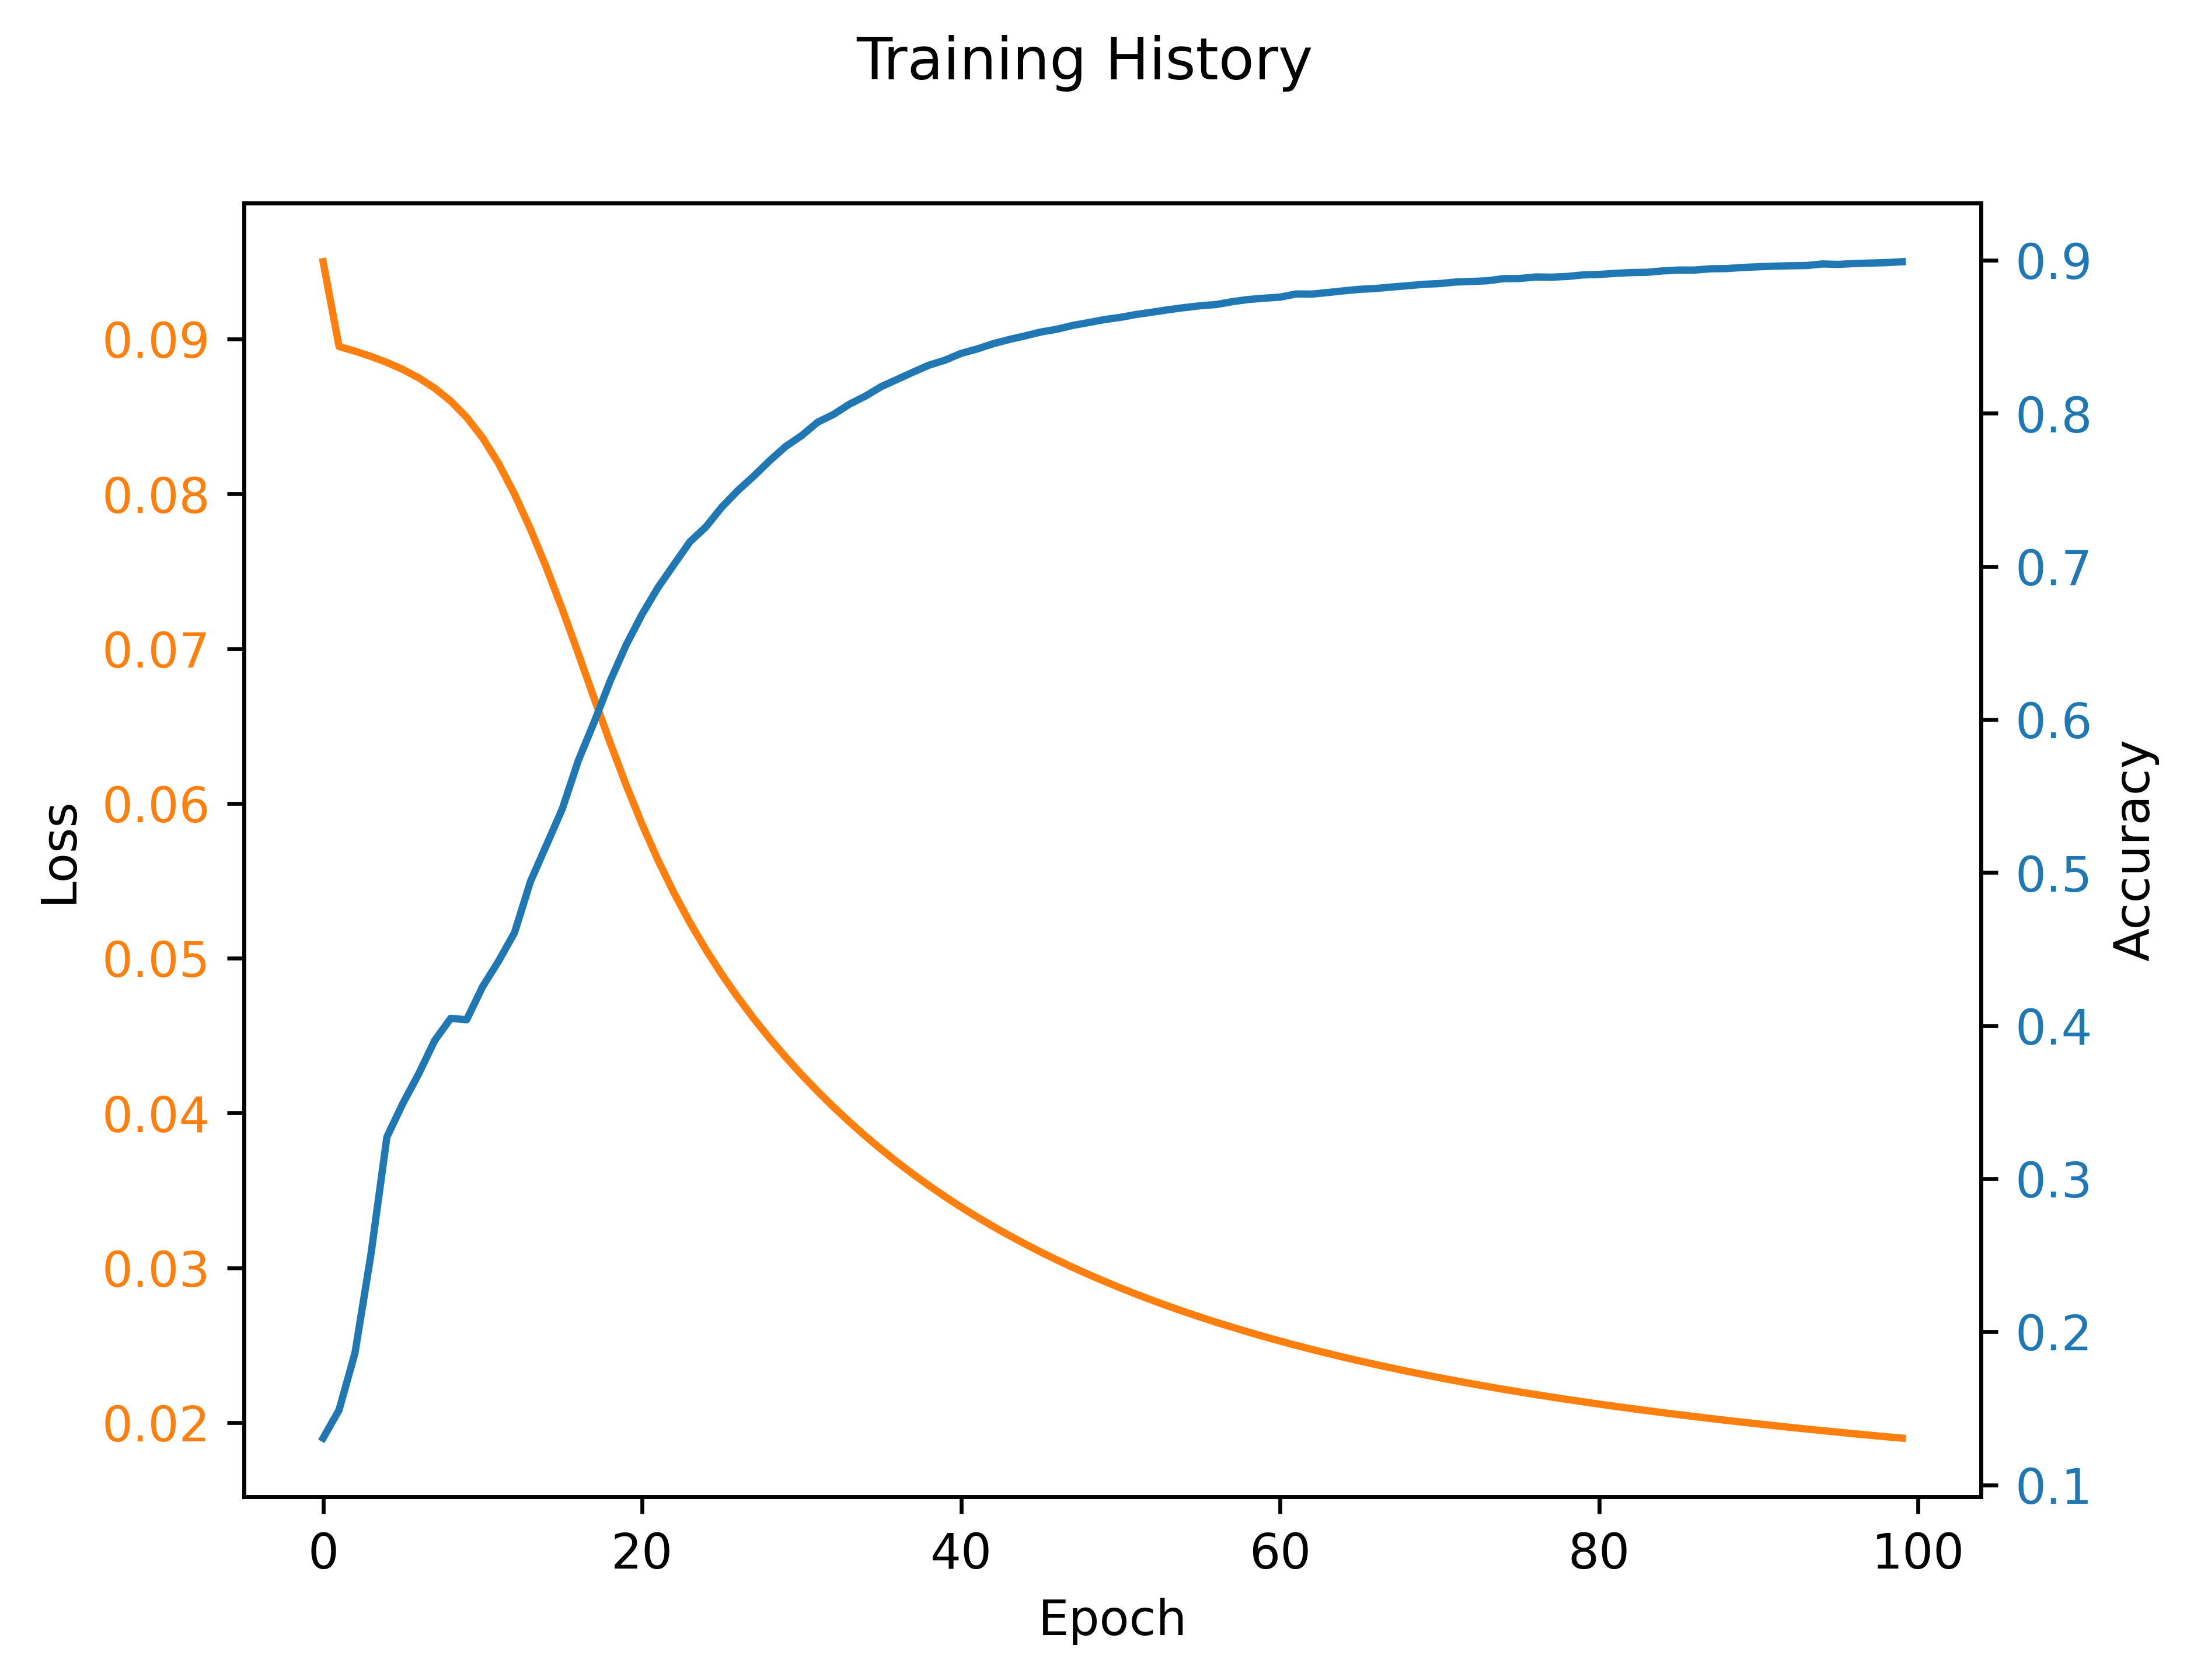

In [27]:
fig, ax1 = plt.subplots()
fig.suptitle("Training History")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(history.history["loss"], color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

ax2 = ax1.twinx()

ax2.set_ylabel("Accuracy")
ax2.plot(history.history["accuracy"], color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.show()


**Plotting Weights**


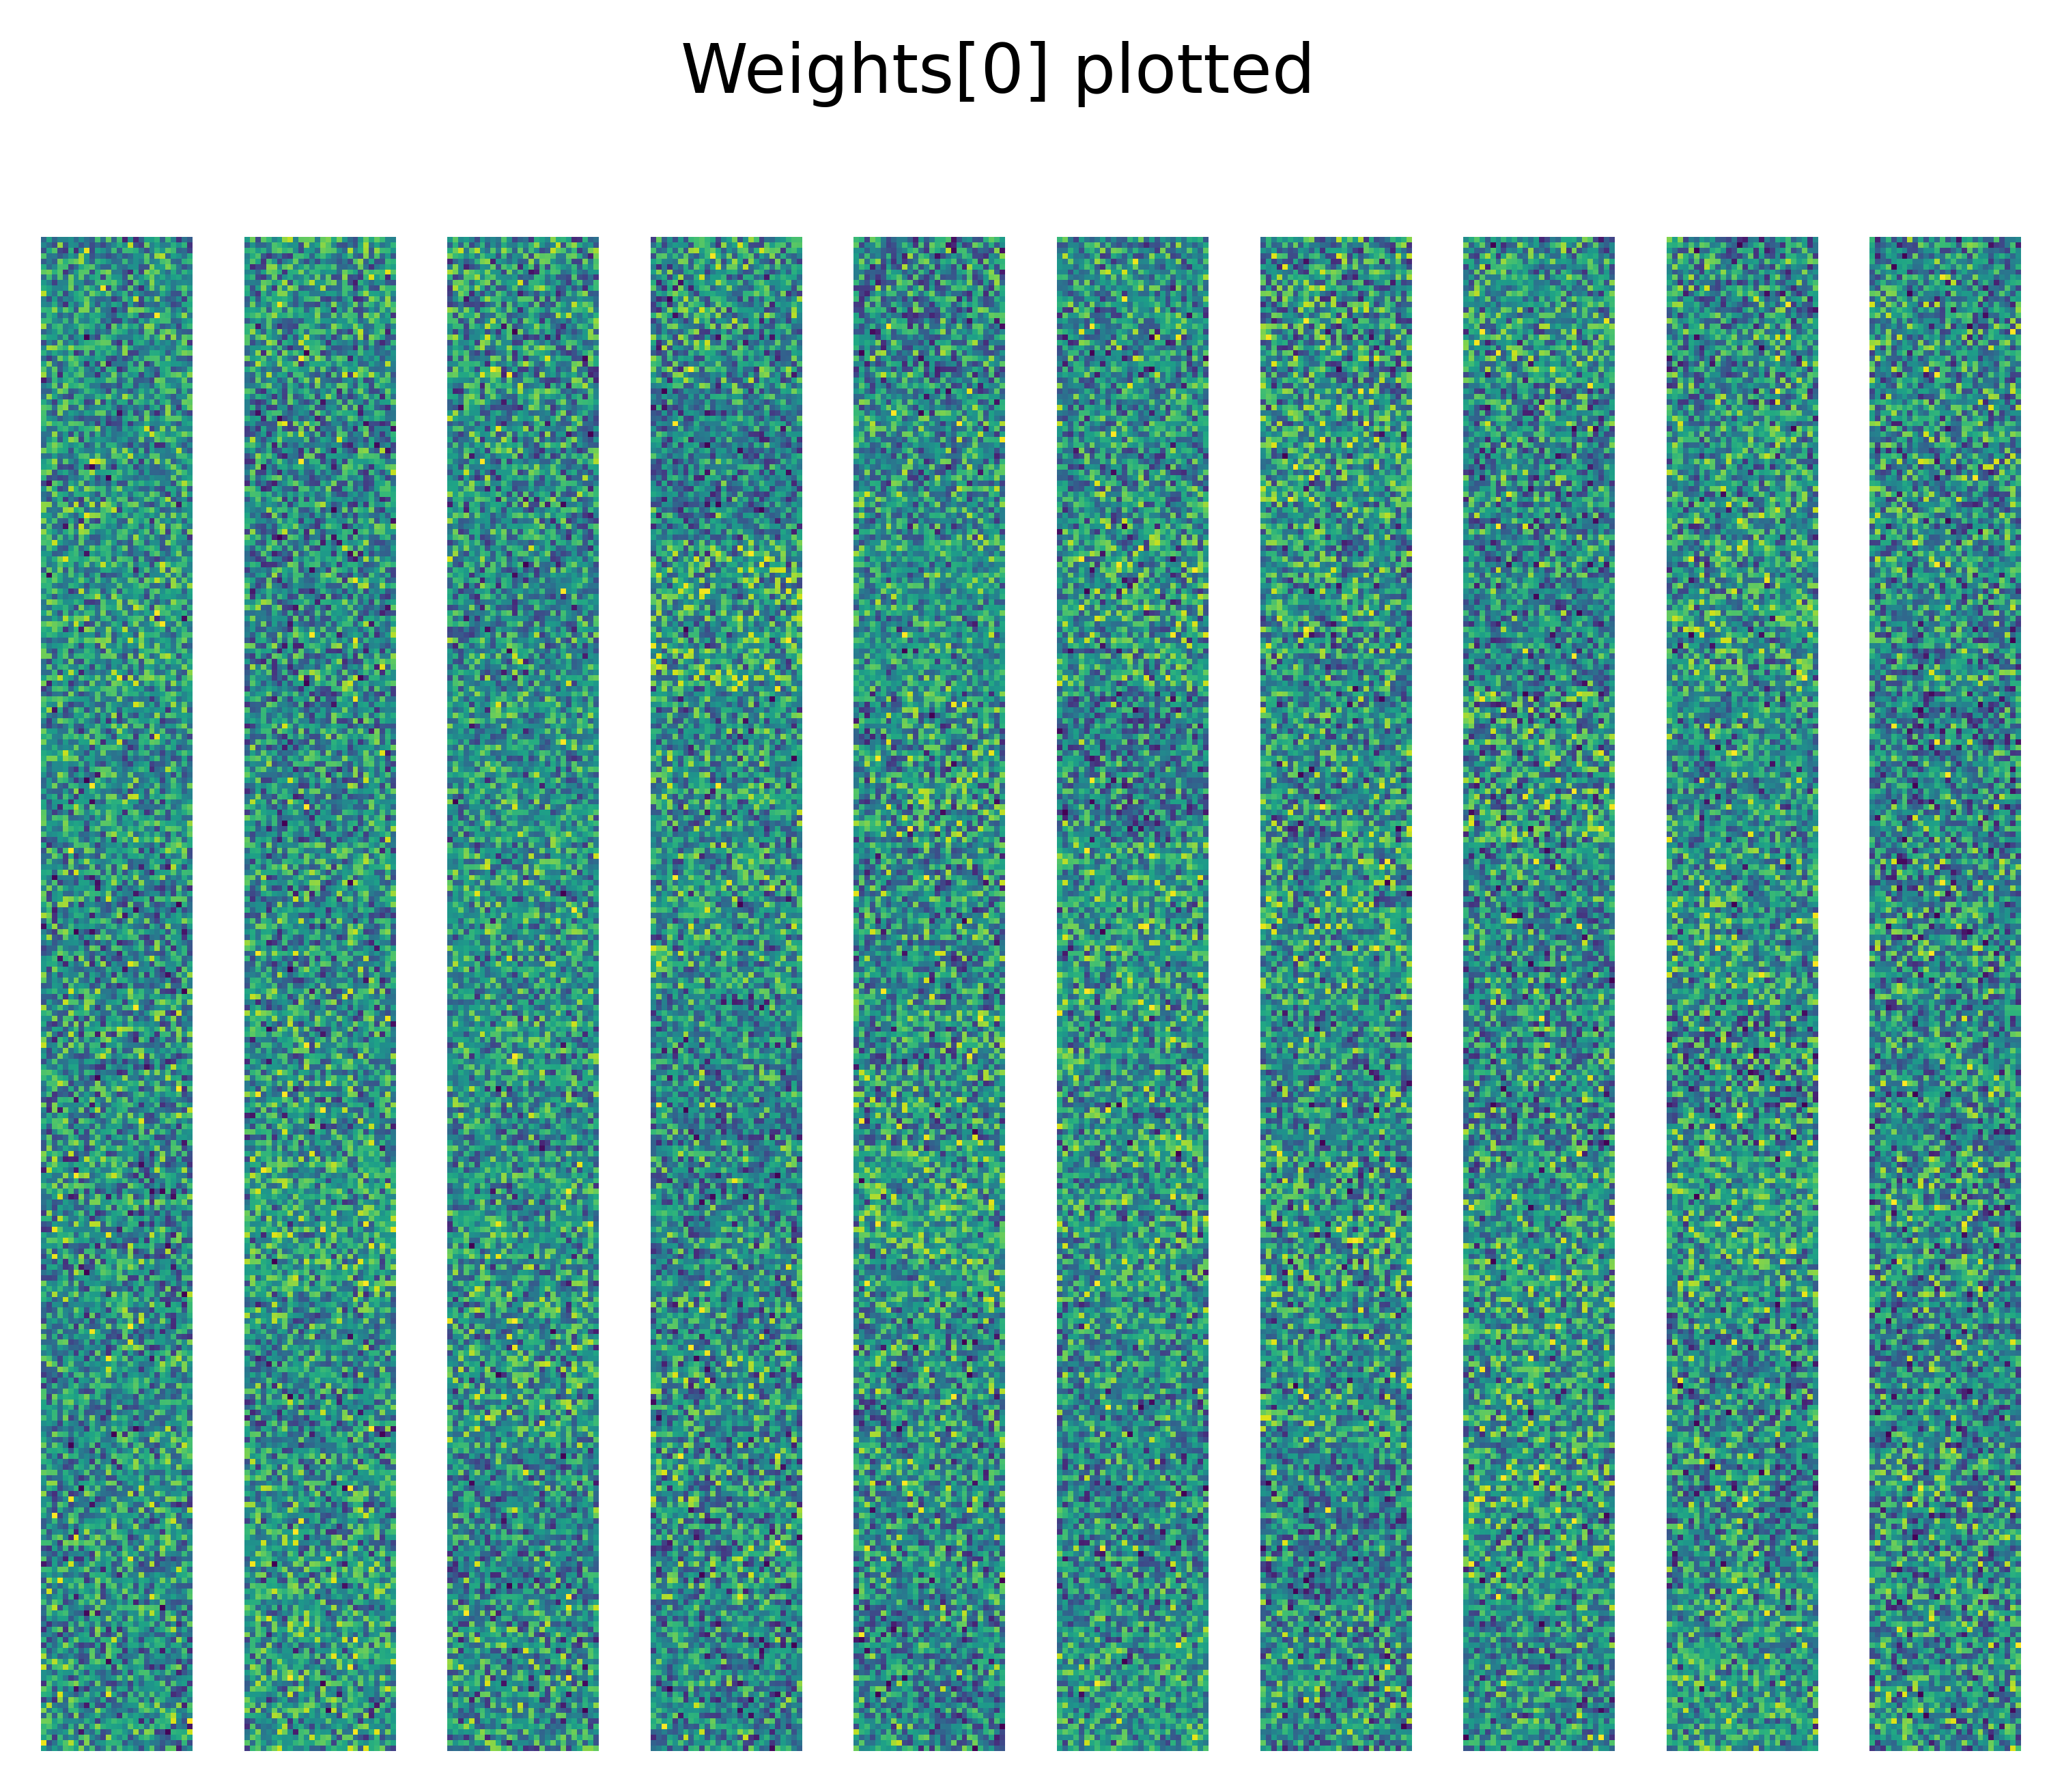

In [28]:
root_im = math.sqrt(NPL[1])
im_rows, im_cols = (math.floor(root_im), math.ceil(root_im))

curr_row = 0
curr_col = 0

fig, axes = plt.subplots(im_rows, im_cols)

fig.suptitle("Weights[0] plotted")

for weights in range(NPL[1]):
    if curr_col == im_cols:
        curr_col = 0
        curr_row += 1

    ax = axes[curr_row][curr_col]
    ax.axis("off")
    ax.imshow(model.layers[1].get_weights()[0][:, weights].reshape((28, 28)))

    curr_col += 1

fig.subplots_adjust(wspace=0, hspace=0)

**Exporting Model for use in TensorFlow.js**


In [30]:
tfjs.converters.save_keras_model(model, "./tfjsmodel")